In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import PIL
from PIL import Image
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Rescaling
from tensorflow.keras.models import Sequential

In [ ]:
#Set constants for image size and processing
img_height = 32
img_width = 32
num_classes = 43

## Part I: Original Images

In [ ]:
#Set directory for dataset
from google.colab import drive
drive.mount('/content/gdrive')

#unzip the folder to a directory
!unzip "/content/gdrive/MyDrive/STA208 Final Project/archive.zip" -d path_original

Streaming output truncated to the last 5000 lines.
  inflating: path_original/train/5/00005_00053_00010.png  
  inflating: path_original/train/5/00005_00053_00011.png  
  inflating: path_original/train/5/00005_00053_00012.png  
  inflating: path_original/train/5/00005_00053_00013.png  
  inflating: path_original/train/5/00005_00053_00014.png  
  inflating: path_original/train/5/00005_00053_00015.png  
  inflating: path_original/train/5/00005_00053_00016.png  
  inflating: path_original/train/5/00005_00053_00017.png  
  inflating: path_original/train/5/00005_00053_00018.png  
  inflating: path_original/train/5/00005_00053_00019.png  
  inflating: path_original/train/5/00005_00053_00020.png  
  inflating: path_original/train/5/00005_00053_00021.png  
  inflating: path_original/train/5/00005_00053_00022.png  
  inflating: path_original/train/5/00005_00053_00023.png  
  inflating: path_original/train/5/00005_00053_00024.png  
  inflating: path_original/train/5/00005_00053_00025.png  
  inf

In [ ]:
#set data paths
data_dir = 'path_original'
train_path = 'path_original/Train'
test_path = 'path_original/'

In [ ]:
#read in the training data
image_data = []
image_labels = []

for i in range(num_classes):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((img_height, img_width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# convert lists to numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


In [ ]:
#shuffling the training data
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
image_labels = image_labels[idx]

In [ ]:
X_train = image_data
y_train = image_labels

#normalize the images
#As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.
X_train = X_train/255 

In [ ]:
#read in the test data
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((img_height, img_width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
y_test = labels

#normalize by 255
X_test = X_test/255


In [ ]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples, nx*ny*nrgb))

#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_test.shape
X_test2 =  X_test.reshape((nsamples,nx*ny*nrgb))

Random Forest

In [ ]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_fit = rf.fit(X_train2, y_train)

In [ ]:
#make predictions
y_pred_rf = rf_fit.predict(X_test2)
y_pred_rf

#model evaluatoin
print(accuracy_score(y_pred_rf, y_test))

0.7860649247822644


Text(0.5, 48.25, 'Predicted label')

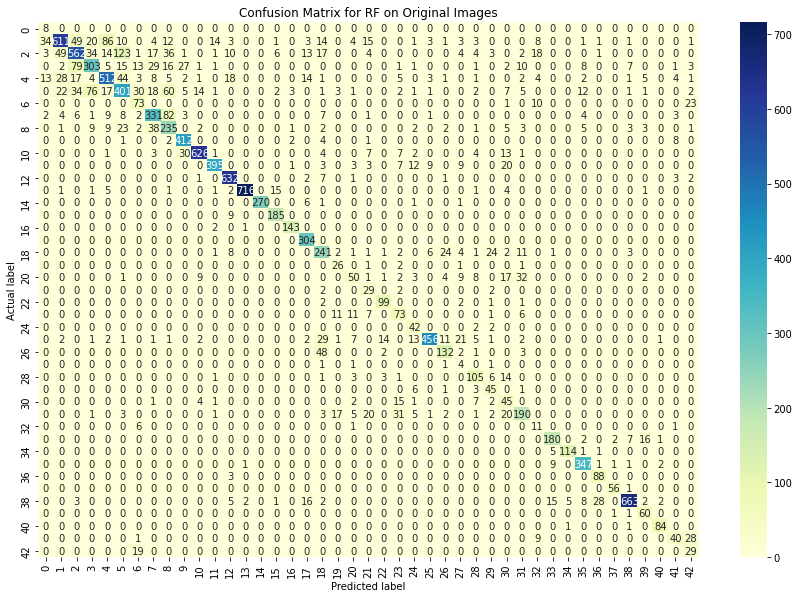

In [ ]:
#obtain the confusion matrix heatmap
import seaborn as sns
conf_mat_rf = confusion_matrix(y_pred_rf,y_test)

class_names = [0,1]

plt.figure(figsize=(12,8))
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True,cmap='YlGnBu',fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for RF on Original Images', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
# grid_rf.fit(X_train2, y_train)

# grid_rf.best_params_

RF using original images: 

Runtime: 3m

Accuracy: 78.6%

SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train2, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_pred_svm = svm.predict(X_test2)

print(accuracy_score(y_pred_svm, y_test))

0.8230403800475059


Text(0.5, 48.25, 'Predicted label')

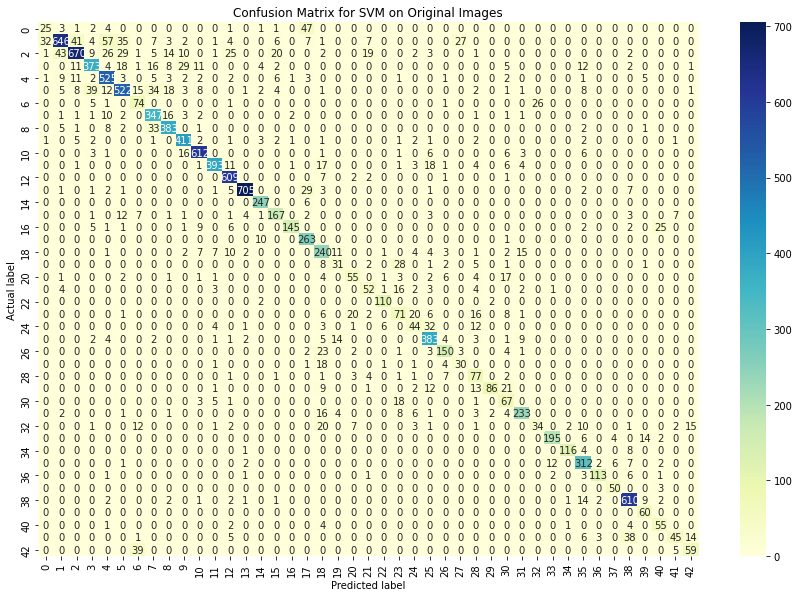

In [ ]:
conf_mat_svm = confusion_matrix(y_pred_svm, y_test)

#obtain the confusion matrix heatmap

class_names = [0,1]

plt.figure(figsize=(12,8))
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(conf_mat_svm), annot=True,cmap='YlGnBu',fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for SVM on Original Images', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

SVM using original images:

Runtime: 11m15s (Train), 7m43s (Predict)

Accuracy: 82.30%

## Part II: Grayscale Images

In [ ]:
#unzip the grey-scaled images folder to a directory
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/MyDrive/STA208 Final Project/Archive 2" -d path_grayscale

Streaming output truncated to the last 5000 lines.
  inflating: path_grayscale/Test/10315.png  
  inflating: path_grayscale/__MACOSX/Test/._10315.png  
  inflating: path_grayscale/Test/6434.png  
  inflating: path_grayscale/__MACOSX/Test/._6434.png  
  inflating: path_grayscale/Test/57.png  
  inflating: path_grayscale/__MACOSX/Test/._57.png  
  inflating: path_grayscale/Test/9707.png  
  inflating: path_grayscale/__MACOSX/Test/._9707.png  
  inflating: path_grayscale/Test/8419.png  
  inflating: path_grayscale/__MACOSX/Test/._8419.png  
  inflating: path_grayscale/Test/817.png  
  inflating: path_grayscale/__MACOSX/Test/._817.png  
  inflating: path_grayscale/Test/12502.png  
  inflating: path_grayscale/__MACOSX/Test/._12502.png  
  inflating: path_grayscale/Test/9934.png  
  inflating: path_grayscale/__MACOSX/Test/._9934.png  
  inflating: path_grayscale/Test/624.png  
  inflating: path_grayscale/__MACOSX/Test/._624.png  
  inflating: path_grayscale/Test/7919.png  
  inflating: path_

In [ ]:
#set data paths for grey scale images
data_dir_gray = 'path_grayscale'
train_path_gray = 'path_grayscale/Train'
test_path_gray = 'path_grayscale/Test/'

In [ ]:
#read in the training data
gray_data = []
gray_labels = []

for i in range(num_classes):
    path = data_dir_gray + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img, cv2.IMREAD_GRAYSCALE)
            image_fromarray = Image.fromarray(image.astype(np.uint8), mode = 'L')
            resize_image = image_fromarray.resize((img_height, img_width))
            gray_data.append(np.array(resize_image))
            gray_labels.append(i)
        except:
            print("Error in " + img)

# convert lists to numpy arrays
gray_data = np.array(gray_data)
gray_labels = np.array(gray_labels)

print(gray_data.shape, gray_labels.shape)

(39209, 32, 32) (39209,)


In [ ]:
#shuffling the training data
gray_idx = np.arange(gray_data.shape[0])
np.random.shuffle(gray_idx)
gray_data = gray_data[gray_idx]
gray_labels = gray_labels[gray_idx]

In [ ]:
X_train_gray = gray_data
y_train_gray = gray_labels

#normalize the images
#As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.
X_train_gray = X_train_gray/255 

In [ ]:
#read in the test data
test_gray = pd.read_csv(data_dir_gray + '/Test.csv')
labels_gray = test_gray["ClassId"].values

#creating string sort for path
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

#sort the test images based on image labels
imgs_gray1 = sorted_alphanumeric(os.listdir(data_dir_gray + '/Test'))
imgs_gray = [test_path_gray + s for s in imgs_gray1]

data_gray =[]

for img in imgs_gray:
    try:
        image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        image_fromarray = Image.fromarray(image.astype(np.uint8), mode = 'L')
        resize_image = image_fromarray.resize((img_height, img_width))
        data_gray.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test_gray = np.array(data_gray)
y_test_gray = labels_gray

#normalize by 255
X_test_gray = X_test_gray/255

In [ ]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples_gray, nx_gray, ny_gray = X_train_gray.shape
X_train_gray2 = X_train_gray.reshape((nsamples_gray, nx_gray*ny_gray))

#so,eventually,model.predict() should also be a 2d input
nsamples_gray, nx_gray, ny_gray = X_test_gray.shape
X_test_gray2 =  X_test_gray.reshape((nsamples_gray, nx_gray*ny_gray))

In [ ]:
X_train_gray.shape

(39209, 32, 32)

Random Forest for Grayscale Images

In [ ]:
#random forest classification for grayscaled images
from sklearn.ensemble import RandomForestClassifier

rf_gray = RandomForestClassifier()
rf_gray_fit = rf_gray.fit(X_train_gray2, y_train_gray)

In [ ]:
#make predictions
y_pred_rf_gray = rf_gray_fit.predict(X_test_gray2)
y_pred_rf_gray

#model evaluatoin
print(accuracy_score(y_pred_rf_gray, y_test_gray))

0.770387965162312


Text(0.5, 48.25, 'Predicted label')

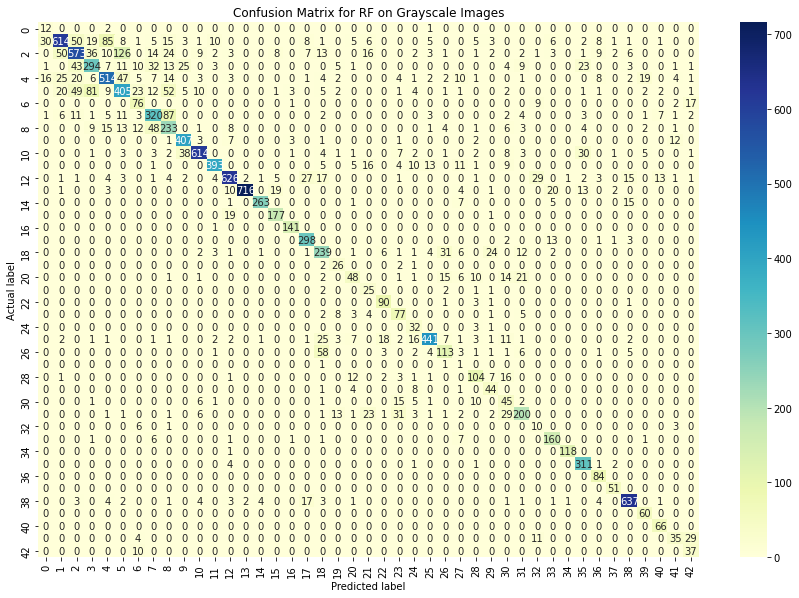

In [ ]:
#obtain the confusion matrix heatmap
conf_mat_rf_gray = confusion_matrix(y_pred_rf_gray, y_test_gray)
class_names = [0,1]

plt.figure(figsize=(12,8))
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(conf_mat_rf_gray), annot=True,cmap='YlGnBu',fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for RF on Grayscale Images', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

  RF on Grayscale Images

  Runtime: 1m40s

  Accuracy: 77.04%

SVM for Grayscale Images

In [ ]:
# fit svm on grayscaled iamges
svm_gray = SVC(kernel='linear', gamma='auto')
svm_gray.fit(X_train_gray2, y_train_gray)

SVC(gamma='auto', kernel='linear')

In [ ]:
#make predictions
y_pred_svm_gray = svm_gray.predict(X_test_gray2)
y_pred_svm_gray

#model evaluatoin
print(accuracy_score(y_pred_svm_gray, y_test_gray))

0.8247030878859858


Text(0.5, 48.25, 'Predicted label')

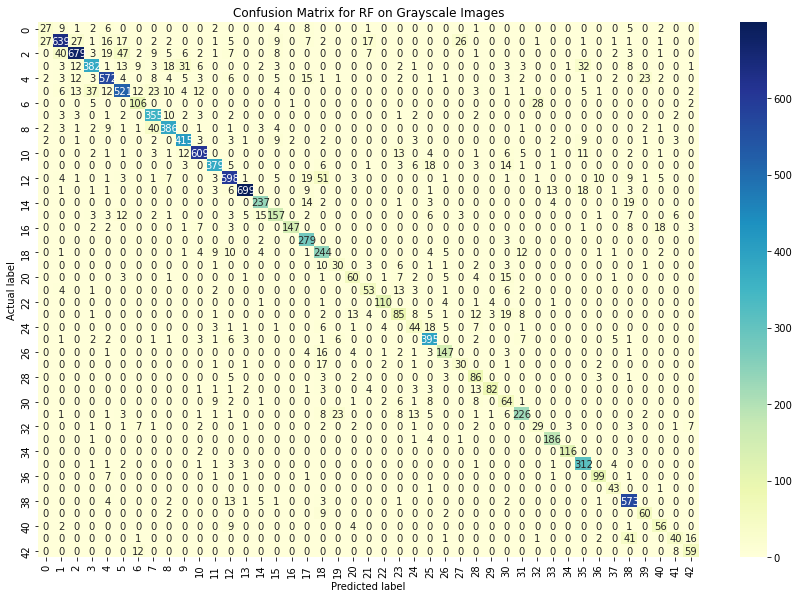

In [ ]:
#obtain the confusion matrix heatmap
conf_mat_svm_gray = confusion_matrix(y_pred_svm_gray, y_test_gray)
class_names = [0,1]

plt.figure(figsize=(12,8))
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(conf_mat_svm_gray), annot=True,cmap='YlGnBu',fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for RF on Grayscale Images', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

  SVM on Grayscale Images

  Runtime: 2m42s(Train), 3m2s (Predict)

  Accuracy: 82.47%

## Part III: Cropped Images

In [ ]:
#unzip the grey-scaled images folder to a directory
!unzip "/content/gdrive/MyDrive/STA208 Final Project/Archive 3.zip" -d path_crop

Streaming output truncated to the last 5000 lines.
  inflating: path_crop/Test/10315.png  
  inflating: path_crop/__MACOSX/Test/._10315.png  
  inflating: path_crop/Test/6434.png  
  inflating: path_crop/__MACOSX/Test/._6434.png  
  inflating: path_crop/Test/57.png   
  inflating: path_crop/__MACOSX/Test/._57.png  
  inflating: path_crop/Test/9707.png  
  inflating: path_crop/__MACOSX/Test/._9707.png  
  inflating: path_crop/Test/8419.png  
  inflating: path_crop/__MACOSX/Test/._8419.png  
  inflating: path_crop/Test/817.png  
  inflating: path_crop/__MACOSX/Test/._817.png  
  inflating: path_crop/Test/12502.png  
  inflating: path_crop/__MACOSX/Test/._12502.png  
  inflating: path_crop/Test/9934.png  
  inflating: path_crop/__MACOSX/Test/._9934.png  
  inflating: path_crop/Test/624.png  
  inflating: path_crop/__MACOSX/Test/._624.png  
  inflating: path_crop/Test/7919.png  
  inflating: path_crop/__MACOSX/Test/._7919.png  
  inflating: path_crop/Test/2861.png  
  inflating: path_crop/

In [ ]:
#set data paths for cropped images
data_dir_crop = 'path_crop'
train_path_crop = 'path_crop/Train'
test_path_crop = 'path_crop/Test/'

In [ ]:
#read in the training data
crop_data = []
crop_labels = []

for i in range(num_classes):
    path = data_dir_crop + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((img_height, img_width))
            crop_data.append(np.array(resize_image))
            crop_labels.append(i)
        except:
            print("Error in " + img)

# convert lists to numpy arrays
crop_data = np.array(crop_data)
crop_labels = np.array(crop_labels)

print(crop_data.shape, crop_labels.shape)

(39209, 32, 32, 3) (39209,)


In [ ]:
#shuffling the training data
crop_idx = np.arange(crop_data.shape[0])
np.random.shuffle(crop_idx)
crop_data = crop_data[crop_idx]
crop_labels = crop_labels[crop_idx]

In [ ]:
X_train_crop = crop_data
y_train_crop = crop_labels

#normalize the images
#As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.
X_train_crop = X_train_crop/255 

In [ ]:
#read in the test data
test_crop = pd.read_csv(data_dir_crop + '/Test.csv')

labels_crop = test_crop["ClassId"].values

imgs_crop1 = sorted_alphanumeric(os.listdir(data_dir_crop + '/Test'))
imgs_crop = [test_path_crop + s for s in imgs_crop1]

data_crop =[]

for img in imgs_crop:
    try:
        image = cv2.imread(img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((img_height, img_width))
        data_crop.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test_crop = np.array(data_crop)
y_test_crop = labels_crop

#normalize by 255
X_test_crop = X_test_crop/255

In [ ]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples_crop, nx_crop, ny_crop, nrgb_crop = X_train_crop.shape
X_train_crop2 = X_train_crop.reshape((nsamples_crop, nx_crop*ny_crop*nrgb_crop))

#so,eventually,model.predict() should also be a 2d input
nsamples_crop, nx_crop, ny_crop, nrgb_crop = X_test_crop.shape
X_test_crop2 =  X_test_crop.reshape((nsamples_crop, nx_crop*ny_crop*nrgb_crop))

Random Forest for Cropped Images

In [ ]:
#random forest classification for cropped images
from sklearn.ensemble import RandomForestClassifier

rf_crop = RandomForestClassifier()
rf_crop_fit = rf_crop.fit(X_train_crop2, y_train_crop)

In [ ]:
#make predictions
y_pred_rf_crop = rf_crop_fit.predict(X_test_crop2)
y_pred_rf_crop

#model evaluatoin
print(accuracy_score(y_pred_rf_crop, y_test_crop))

0.8192399049881235


array([[ 16,   0,   0, ...,   0,   0,   0],
       [ 28, 641,  32, ...,   0,   0,   0],
       [  1,  22, 628, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ...,  88,   0,   0],
       [  0,   0,   0, ...,   0,  29,  30],
       [  0,   0,   0, ...,   0,   0,  37]])

In [ ]:
#obtain the confusion matrix heatmap
conf_mat_rf_crop = confusion_matrix(y_pred_rf_crop, y_test_crop)
class_names = [0,1]

plt.figure(figsize=(12,8))
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(conf_mat_rf_crop), annot=True,cmap='YlGnBu',fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for RF on Grayscale Images', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

  RF on Cropped Images

  Runtime: 3m2s

  Accuracy: 81.92%

In [ ]:
#SVM on cropped
from sklearn.svm import SVC

svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train_crop2, y_train_crop)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_pred_svm_crop = svm.predict(X_test_crop2)

print(accuracy_score(y_pred_svm_crop, y_test_crop))

0.8767220902612827


Text(0.5, 48.25, 'Predicted label')

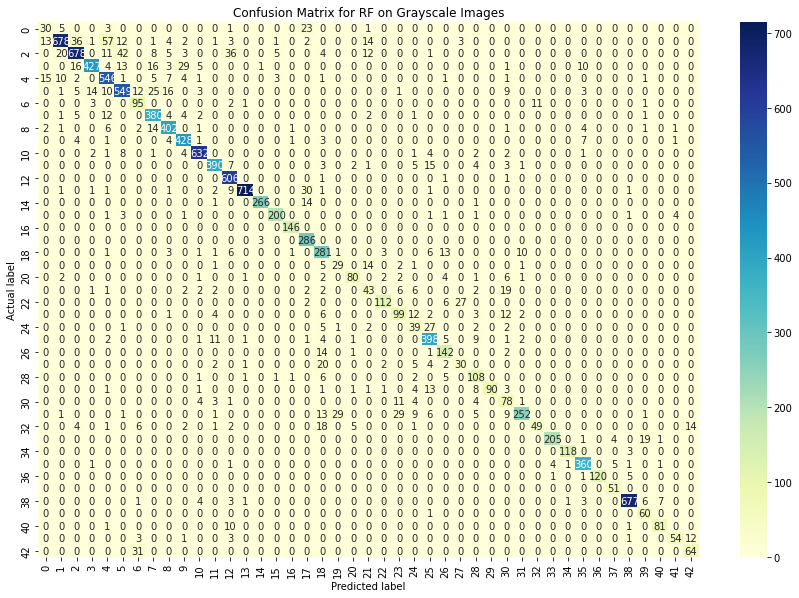

In [ ]:
#obtain the confusion matrix heatmap
conf_mat_svm_crop = confusion_matrix(y_pred_svm_crop, y_test_crop)
class_names = [0,1]

plt.figure(figsize=(12,8))
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(conf_mat_svm_crop), annot=True,cmap='YlGnBu',fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for SVM on Cropped Images', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

SVM on Cropped 

Runtime: 8m (Train), 6m6s (Predict)

Accuracy: 87.67%

## Part IV: Model Runtime Comparison

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({'Model': ['RF', 'RF', 'RF', 'SVM', 'SVM', 'SVM'],
                  'Train Time': [180, 100, 182, 675, 162, 480], 
                  'Predict Time': [1, 1, 1, 463, 182, 366],
                  'Image': ['Original', 'Grayscale', 'Cropped', 'Original', 'Grayscale', 'Cropped']})

Text(0, 0.5, 'Train Time(s)')

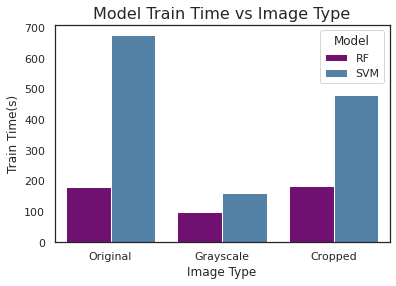

In [ ]:
# runtime for train
sns.set(style='white')

# create grouped bar chart
sns.barplot(x='Image', y='Train Time', hue='Model', data=df,
            palette=['purple', 'steelblue'])

# add overall title
plt.title('Model Train Time vs Image Type', fontsize=16)

# add axis titles
plt.xlabel('Image Type')
plt.ylabel('Train Time(s)')

# rotate x-axis labels
# plt.xticks(rotation=45)

Text(0, 0.5, 'Predict Time(s)')

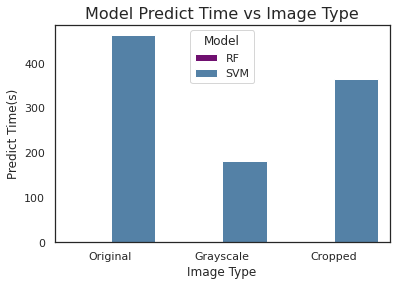

In [ ]:
# runtime for predict
sns.set(style='white')

# create grouped bar chart
sns.barplot(x='Image', y='Predict Time', hue='Model', data=df,
            palette=['purple', 'steelblue'])

# add overall title
plt.title('Model Predict Time vs Image Type', fontsize=16)

# add axis titles
plt.xlabel('Image Type')
plt.ylabel('Predict Time(s)')

# rotate x-axis labels
# plt.xticks(rotation=45)